# Import data

In [ ]:
#!pip install linearmodels

In [1]:
#@title Place path here
path = "/content/drive/MyDrive/Datasets/ElectricityCostsData Center/electricity_prices.csv" #@param {type:"string"}
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

df = pd.read_csv(path)

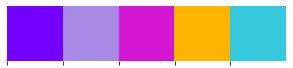

In [ ]:
# Color Palette
custom_colors = ['#7400ff', '#a788e4', '#d216d2', '#ffb500', '#36c9dd']
sns.palplot(sns.color_palette(custom_colors))

# Set Style
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)

# Set tick size
plt.rc('xtick',labelsize=12)
plt.rc('ytick',labelsize=12)


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38014 entries, 0 to 38013
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   DateTime              38014 non-null  object
 1   Holiday               38014 non-null  object
 2   HolidayFlag           38014 non-null  int64 
 3   DayOfWeek             38014 non-null  int64 
 4   WeekOfYear            38014 non-null  int64 
 5   Day                   38014 non-null  int64 
 6   Month                 38014 non-null  int64 
 7   Year                  38014 non-null  int64 
 8   PeriodOfDay           38014 non-null  int64 
 9   ORKTemperature        38014 non-null  object
 10  ORKWindspeed          38014 non-null  object
 11  CO2Intensity          38014 non-null  object
 12  ActualWindProduction  38014 non-null  object
 13  SystemLoadEP2         38014 non-null  object
 14  SMPEP2                38014 non-null  object
dtypes: int64(7), object(8)
memory usage:

In [3]:
df.head()

,DateTime,Holiday,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
0,01/11/2011 00:00,None,0,1,44,1,11,2011,0,6.00,9.30,600.71,356.00,3159.60,54.32
1,01/11/2011 00:30,None,0,1,44,1,11,2011,1,6.00,11.10,605.42,317.00,2973.01,54.23
2,01/11/2011 01:00,None,0,1,44,1,11,2011,2,5.00,11.10,589.97,311.00,2834.00,54.23
3,01/11/2011 01:30,None,0,1,44,1,11,2011,3,6.00,9.30,585.94,313.00,2725.99,53.47
4,01/11/2011 02:00,None,0,1,44,1,11,2011,4,6.00,11.10,571.52,346.00,2655.64,39.87


# Data types 

In [ ]:
"""for i in range(9,15):
  df.iloc[:,i]= df.iloc[:,i].astype("float")
df.info()"""  
print("ValueError: could not convert string to float: '?' ")

ValueError: could not convert string to float: '?' 


In [4]:
df.ORKTemperature.unique()

array(['6.00', '5.00', '4.00', '8.00', '9.00', '?', '11.00', '12.00',
       '13.00', '10.00', '7.00', '3.00', '14.00', '2.00', '1.00', '0.00',
       '-1.00', '15.00', '16.00', '17.00', '18.00', '19.00', '20.00',
       '21.00', '22.00', '-2.00', '-3.00', '-4.00', '23.00', '24.00',
       '25.00', '-0.00'], dtype=object)

In [5]:
df.query('CO2Intensity == "?"').iloc[:,8:]

,PeriodOfDay,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
8468,22,6.00,40.70,?,1326.00,4432.77,49.89
8469,23,7.00,42.60,?,1327.00,4444.92,49.89
8470,24,7.00,44.40,?,1345.00,4483.29,49.89
17334,8,1.00,22.20,?,?,2642.11,39.39
23930,28,9.00,24.10,?,413.00,4741.27,106.55
24768,2,?,?,?,?,?,?
24769,3,?,?,?,?,?,?


It seems "?" represents null. At least I'm assuming that.

In [6]:

df.replace("?", np.nan, inplace=True)

for i in range(9,15):
  df.iloc[:,i]= df.iloc[:,i].astype("float")
  
df.isna().sum()

DateTime                  0
Holiday                   0
HolidayFlag               0
DayOfWeek                 0
WeekOfYear                0
Day                       0
Month                     0
Year                      0
PeriodOfDay               0
ORKTemperature          295
ORKWindspeed            299
CO2Intensity              7
ActualWindProduction      5
SystemLoadEP2             2
SMPEP2                    2
dtype: int64

Are these values missing at random?

In [7]:
null  = df[df.ORKWindspeed.isna() | df.ORKTemperature.isna() | df.CO2Intensity.isna() | df.ActualWindProduction.isna() | df.SystemLoadEP2.isna()  ]
null_and  = df[df.ORKWindspeed.isna() & df.ORKTemperature.isna()  ]

null_and.isna().sum()

DateTime                  0
Holiday                   0
HolidayFlag               0
DayOfWeek                 0
WeekOfYear                0
Day                       0
Month                     0
Year                      0
PeriodOfDay               0
ORKTemperature          269
ORKWindspeed            269
CO2Intensity              2
ActualWindProduction      2
SystemLoadEP2             2
SMPEP2                    2
dtype: int64

In [8]:
null.isna().sum()

DateTime                  0
Holiday                   0
HolidayFlag               0
DayOfWeek                 0
WeekOfYear                0
Day                       0
Month                     0
Year                      0
PeriodOfDay               0
ORKTemperature          295
ORKWindspeed            299
CO2Intensity              7
ActualWindProduction      5
SystemLoadEP2             2
SMPEP2                    2
dtype: int64

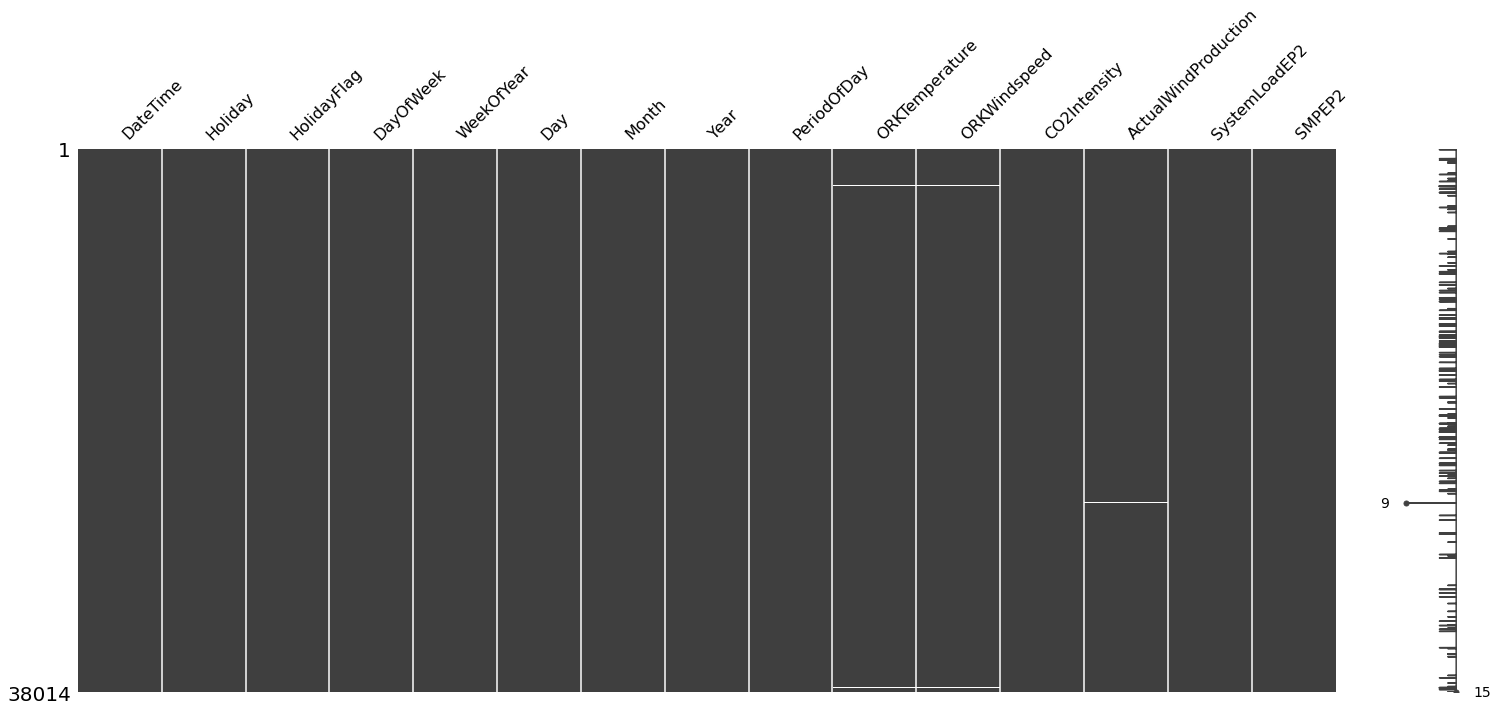

In [10]:
msno.matrix(df)
plt.show()

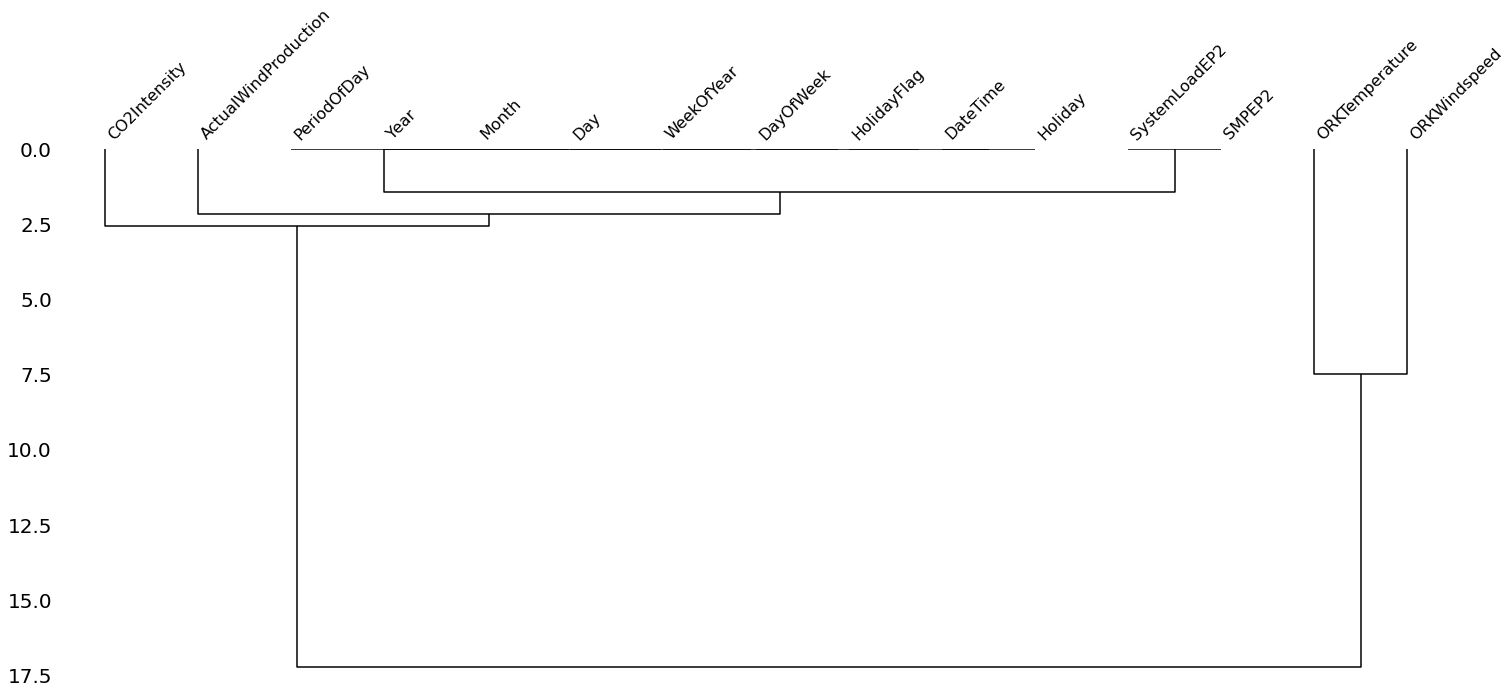

In [12]:
msno.dendrogram(df)
plt.show()

There are placeres were ORKWindspeed is missing but not ORKTemperature  and vice-versa (I checked!)

In [ ]:
df["DateTime"]= pd.to_datetime(df.DateTime, format='%d/%m/%Y %H:%M')
df.set_index("DateTime", inplace=True,drop=True)
df_ = df.copy()
df_["is_missing_temp"] = ~(df_.ORKTemperature.isna())
df_daily = df_.resample("D").agg({"ORKTemperature":"min","ORKWindspeed": "mean", "CO2Intensity":"mean", "SMPEP2": "min","is_missing_temp":"min"})
df_missing_temp = df_daily[df_daily.is_missing_temp==False]

df_missing_temp.describe()


,ORKTemperature,ORKWindspeed,CO2Intensity,SMPEP2
count,128.000000,128.000000,128.000000,128.000000
mean,6.945312,20.613136,475.305908,35.344687
std,4.198441,7.698462,77.702369,8.083691
min,-4.000000,5.853191,266.970000,5.660000
25%,4.000000,14.206857,430.022187,31.502500
50%,7.000000,19.572340,479.872396,36.975000
75%,10.000000,24.634043,524.755052,40.187500
max,16.000000,45.617391,637.567917,50.240000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 38014 entries, 2011-11-01 00:00:00 to 2013-12-31 23:30:00
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Holiday               38014 non-null  object 
 1   HolidayFlag           38014 non-null  int64  
 2   DayOfWeek             38014 non-null  int64  
 3   WeekOfYear            38014 non-null  int64  
 4   Day                   38014 non-null  int64  
 5   Month                 38014 non-null  int64  
 6   Year                  38014 non-null  int64  
 7   PeriodOfDay           38014 non-null  int64  
 8   ORKTemperature        37719 non-null  float64
 9   ORKWindspeed          37715 non-null  float64
 10  CO2Intensity          38007 non-null  float64
 11  ActualWindProduction  38009 non-null  float64
 12  SystemLoadEP2         38012 non-null  float64
 13  SMPEP2                38012 non-null  float64
dtypes: float64(6), int64(7), object(1)


In [ ]:
df_is_miss =  df_[df_.is_missing_temp==False]
count = df_[df_.is_missing_temp==False].resample("D").count().sort_values(by="HolidayFlag", ascending=True)[["Holiday"]].rename(columns={"Holiday":"Count"})

print("Nº of days with a missing value:" ,len(count[count.Count>0]))


Nº of days with a missing value: 128


In [ ]:
def diff_of_means(data_1, data_2):
  """Difference in means of two arrays."""

  # The difference of means of data_1, data_2: diff
  diff = data_1.mean()-data_2.mean()

  return diff


def draw_perm_reps(data1, data2, func, size=1):
  """Generate multiple permutation replicates."""

  # Initialize array of replicates: perm_replicates
  perm_replicates = np.empty(size)
  data = np.concatenate((data1,data2))


	# Permute the concatenated array: scramble (change the order)
  for i in range(size):
    permuted_data = np.random.permutation(data)
    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]
     
    # Compute the test statistic
    perm_replicates[i] = func(perm_sample_1,perm_sample_2)

  return perm_replicates


In [ ]:
df_missing_temp = df_daily.loc[df_daily.is_missing_temp==False,"ORKTemperature" ]
df_not_missing_temp = df_.resample("D").min()["ORKTemperature"]
obs=diff_of_means(df_not_missing_temp,df_missing_temp )
reps = draw_perm_reps(df_not_missing_temp,df_missing_temp,diff_of_means,size=10000)
p = np.sum(reps > obs) / len(reps)
print("Hypothesis testing \nAlternative : Days with a null value have a lower daily min temperature")
print("p-value: ",p)


Hypothesis testing 
Alternative : Days with a null value have a lower daily min temperature
p-value:  0.5059


In [ ]:
print(f"null rows represent {round(len(null)*100 / len(df), 2)} % of sample")
print("Null per year: \n")
print(null.Year.value_counts(normalize=True))
print("\nNull per Month: \n")
print(null.Month.value_counts(normalize=True).sort_values(ascending=False).head())
print("\n Holiday:")
print(null.HolidayFlag.value_counts(normalize=True).sort_index())
print("\ntime of day" )
print(null.PeriodOfDay.value_counts(normalize=True).sort_values(ascending=False).head())

null rows represent 0.87 % of sample
Null per year: 

2012    0.533133
2013    0.271084
2011    0.195783
Name: Year, dtype: float64

Null per Month: 

12    0.481928
4     0.084337
8     0.060241
11    0.060241
2     0.054217
Name: Month, dtype: float64

 Holiday:
0    0.638554
1    0.361446
Name: HolidayFlag, dtype: float64

time of day
10    0.057229
7     0.036145
11    0.036145
21    0.033133
23    0.030120
Name: PeriodOfDay, dtype: float64


Althoug 48 % of the nulls are from December.. well.. ah.. the other half is not.
Only 2 rows missing all the metrics  and 269 rows missing both windspeed and temperature

I'll proclame: no clear relationship ->  It's ok to use the powerfull MICE.

## Null imputation 

In [ ]:

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

df_=df.copy()
df= df.reset_index().iloc[:,1:]
# Prepare the data 
Holiday = df.groupby("Holiday").mean().reset_index()[["Holiday"]].reset_index()

df = pd.merge(df, Holiday , on="Holiday", how="left").rename(columns={"index":"Holiday_code"})
MICE_data =  df.iloc[:,2:]


# Appy the MICE imputation 
lr = LinearRegression()
imp = IterativeImputer(estimator=lr,missing_values=np.nan, max_iter=10, verbose=2, imputation_order='roman',random_state=0)
X=imp.fit_transform(MICE_data)


data = pd.DataFrame(X, columns=list(MICE_data.columns))

# change the columns in df 

for col in list(df.iloc[:,8:14].columns):
  df.loc[:,col]= data.loc[:,col]
df["DateTime"]= df_.index
df.set_index("DateTime", inplace=True,drop=True)
df.info()

[IterativeImputer] Completing matrix with shape (38014, 13)
[IterativeImputer] Ending imputation round 1/10, elapsed time 0.31
[IterativeImputer] Change: 1272.9816537647666, scaled tolerance: 6.30975 
[IterativeImputer] Ending imputation round 2/10, elapsed time 0.61
[IterativeImputer] Change: 194.1878853748375, scaled tolerance: 6.30975 
[IterativeImputer] Ending imputation round 3/10, elapsed time 0.93
[IterativeImputer] Change: 44.56783395495499, scaled tolerance: 6.30975 
[IterativeImputer] Ending imputation round 4/10, elapsed time 1.23
[IterativeImputer] Change: 11.374513094564492, scaled tolerance: 6.30975 
[IterativeImputer] Ending imputation round 5/10, elapsed time 1.52
[IterativeImputer] Change: 3.7258347132747076, scaled tolerance: 6.30975 
[IterativeImputer] Early stopping criterion reached.
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 38014 entries, 2011-11-01 00:00:00 to 2013-12-31 23:30:00
Data columns (total 15 columns):
 #   Column                Non-Null Coun

No- null values and rigth data types 

# Validate

In [ ]:
df[["Holiday"]].describe()

,Holiday
count,38014
unique,15
top,None
freq,36478


In [ ]:
none = df.query('Holiday =="None"').index
HolidayFlag_0 = df.query('HolidayFlag ==0').index
assert((none== HolidayFlag_0).sum() == len(none))
print(f"Percentage of holidays : {round((1-df.Holiday.value_counts(normalize=True)[0])*100,2)} %")

Percentage of holidays : 4.04 %


In [ ]:
df.iloc[:,1:].describe( ).loc[["min","max","25%","75%", "mean"],:]

,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2,Holiday_code
min,0.000000,0.000000,1.000000,1.000000,1.000000,2011.000000,0.000000,-4.000000,0.000000,0.0000,1.0000,1809.960000,-47.740000,0.000000
max,1.000000,6.000000,52.000000,31.000000,12.000000,2013.000000,47.000000,25.000000,75.900000,842.8800,1769.0000,6309.750000,1000.000000,14.000000
25%,0.000000,1.000000,15.000000,8.000000,4.000000,2012.000000,12.000000,7.000000,13.000000,421.0925,199.0000,3058.225000,45.780000,11.000000
75%,0.000000,5.000000,43.000000,23.000000,10.000000,2013.000000,35.750000,13.000000,24.100000,537.4750,793.0000,4427.572500,72.107500,11.000000
mean,0.040406,2.997317,28.124586,15.739412,6.904246,2012.383859,23.501105,9.623778,19.230252,479.3645,520.7734,3785.898164,64.135712,10.827011


**Conclusions on validation:**

* Mean of HolydaysFlag indicates 4.04 % of holidays so does the column Holiday. 

* When HolidayFlag is 0 Holiday  is 'None' 

* Max and Min for day DayOfWeek, WeekOfYear,   Day, Month,  Year, and  PeriodOfDay makes perfect sense given its context.

* ORKTemperature between -4 and 25, we are not told but I'm assuming it is in ºC

* ORKWindspeed again I could assume km/h but is not clear. It could be other depending on the region (which I'm not told), either km/h or mph (most used ones) makes sense for this variable.

* CO2Intensity if we assume the common usage of (gCO2/kWh) this value makes sense for the usage of fossil fuels to generate electricity. 

* ActualWindProduction and SystemLoadEP2 -> assuming kWh ( or "0.5 h" : each row is 30 min)

* SMPEP2 currency (if we use the mean of SystemLoadEP2 and SMPEP2 to calculate the price per kWh we have 1.6 "cents" per kWh )

  * Although this is a very low price per kWh, it is usual to decrease as size increases:

* There are 15 unique codes in  Holiday_code, same as unique values in Holiday 

# Create my Data Model for Power BI 

## Fact tables

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 38014 entries, 2011-11-01 00:00:00 to 2013-12-31 23:30:00
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Holiday               38014 non-null  object 
 1   HolidayFlag           38014 non-null  int64  
 2   DayOfWeek             38014 non-null  int64  
 3   WeekOfYear            38014 non-null  int64  
 4   Day                   38014 non-null  int64  
 5   Month                 38014 non-null  int64  
 6   Year                  38014 non-null  int64  
 7   PeriodOfDay           38014 non-null  int64  
 8   ORKTemperature        38014 non-null  float64
 9   ORKWindspeed          38014 non-null  float64
 10  CO2Intensity          38014 non-null  float64
 11  ActualWindProduction  38014 non-null  float64
 12  SystemLoadEP2         38014 non-null  float64
 13  SMPEP2                38014 non-null  float64
 14  Holiday_code          38014 non-nul

In [ ]:
# Metrics


Metrics = df.iloc[:,[2,14,8,9,10,11,12,13]]

Metrics.info()


# Some calculations I thing help describe the data 
Results = Metrics.copy()
Results["weight_of_wind"] = (Results['ActualWindProduction'] / Results['SystemLoadEP2'])*100
Results["non_wind"] = Results['SystemLoadEP2'] -Results['ActualWindProduction'] 
Results["price_per_kwh"] = Results['SMPEP2'] / Results['SystemLoadEP2']
Results = Results.iloc[:,[0,1,8,9,10]]
Results.info()

#Save it to use in Power BI
#Metrics.to_csv('/content/drive/MyDrive/Datasets/ElectricityCostsData Center/FactMetrics.csv', index=True)
#Results.to_csv('/content/drive/MyDrive/Datasets/ElectricityCostsData Center/FactResults.csv', index=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 38014 entries, 2011-11-01 00:00:00 to 2013-12-31 23:30:00
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   DayOfWeek             38014 non-null  int64  
 1   Holiday_code          38014 non-null  int64  
 2   ORKTemperature        38014 non-null  float64
 3   ORKWindspeed          38014 non-null  float64
 4   CO2Intensity          38014 non-null  float64
 5   ActualWindProduction  38014 non-null  float64
 6   SystemLoadEP2         38014 non-null  float64
 7   SMPEP2                38014 non-null  float64
dtypes: float64(6), int64(2)
memory usage: 2.6 MB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 38014 entries, 2011-11-01 00:00:00 to 2013-12-31 23:30:00
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DayOfWeek       38014 non-null  int64  
 1   Holiday_code  

## Dimensions

In [ ]:
#DimDate
Date = df.iloc[:,[-1,1,2,3,4,5,6,7]]
Date.info()

#DimHoliday
Holiday= Holiday.rename(columns={"index":"Holiday_code"})
Holiday.info()

#DimWeekday
day =["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekday = pd.DataFrame( day,index = np.arange(7), columns=["DayOfWeekName"] ).reset_index().rename(columns={"index":"DayOfWeek"})
weekday.info()

# Export to use in Power BI
#Date.to_csv('/content/drive/MyDrive/Datasets/ElectricityCostsData Center/DimDate.csv', index=True)
#Holiday.to_csv('/content/drive/MyDrive/Datasets/ElectricityCostsData Center/DimHoliday.csv', index=False)
#df.to_csv('/content/drive/MyDrive/Datasets/ElectricityCostsData Center/electricity_prices_cleaned.csv', index=True)
#weekday.to_csv('/content/drive/MyDrive/Datasets/ElectricityCostsData Center/DimWeekday.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 38014 entries, 2011-11-01 00:00:00 to 2013-12-31 23:30:00
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Holiday_code  38014 non-null  int64
 1   HolidayFlag   38014 non-null  int64
 2   DayOfWeek     38014 non-null  int64
 3   WeekOfYear    38014 non-null  int64
 4   Day           38014 non-null  int64
 5   Month         38014 non-null  int64
 6   Year          38014 non-null  int64
 7   PeriodOfDay   38014 non-null  int64
dtypes: int64(8)
memory usage: 2.6 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Holiday_code  15 non-null     int64 
 1   Holiday       15 non-null     object
dtypes: int64(1), object(1)
memory usage: 368.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (to

# Price 

In [ ]:
#@title Changes
df["weight_of_wind"] = (df['ActualWindProduction'] / df['SystemLoadEP2'])*100
df["non_wind"] = df['SystemLoadEP2'] -df['ActualWindProduction'] 
df["price_per_kwh"] = df['SMPEP2'] / df['SystemLoadEP2']
df["shift_1d_price_per_kwh"] = df[["price_per_kwh"]].shift(-48).fillna(0)
df["shift_2d_price_per_kwh"] = df[["price_per_kwh"]].shift(-48*2).fillna(0)



for i in df.iloc[:, 8:20]:
  var= i+"Ewma1"
  var7 = i+"Ewma7"
  df[f"{var}"] = df[i].ewm(span=48).mean()
  df[f"{var7}"] = df[i].ewm(span=48*7).mean()

df["shift_7d_price_per_kwh"] = df[["price_per_kwh"]].shift(-48*7).fillna(0).ewm(span=48*7).mean()
#where holiday 
df["price_is_eqOrbellow0"] =0
df.loc[df.price_per_kwh<=0, "price_is_eqOrbellow0"]=1
hol_ = df.loc[df.HolidayFlag==1,:]
w_2011= list(set([       x        for     x    in hol_.loc[hol_.Year==2011    , "WeekOfYear"]          ]))
w_2012= list(set([       x        for     x    in hol_.loc[hol_.Year==2012    , "WeekOfYear"]          ]))
w_2013= list(set([       x        for     x    in hol_.loc[hol_.Year==2013    , "WeekOfYear"]          ]))
df["Legend"]=0
df.loc[ (df.Year==2011) & (df.WeekOfYear.isin(w_2011))  ,  "Legend"] =1
df.loc[ (df.Year==2012) & (df.WeekOfYear.isin(w_2012))  ,  "Legend"] =1
df.loc[ (df.Year==2013) & (df.WeekOfYear.isin(w_2013))  ,  "Legend"] =1
df["weekdayFlag"]=0
df.loc[ df.DayOfWeek.isin([6,5])  ,"weekdayFlag"] =1 

df["NonHoliWeekDay"] = 0 
df.loc[ (df.weekdayFlag!=1) & (df.HolidayFlag!=1)      ,"NonHoliWeekDay"] =1 
df["inflated"] = 0
df.loc[df.price_per_kwh>0.07,"inflated"]=1
df["inflatedShifted1d"] = 0
df.loc[df.shift_1d_price_per_kwh>0.07,"inflatedShifted1d"]=1
df["inflatedShifted2d"] = 0
df.loc[df.shift_2d_price_per_kwh>0.07,"inflatedShifted2d"]=1


df["price_pct_change"] = df.price_per_kwh.pct_change(freq='D'       )*100
df.loc[ df.price_pct_change ==np.inf  ,"price_pct_change"] =0


df["price_pct_change_EWMVar"] = df["price_pct_change"].ewm(span=48).std()
df["price_per_kwh_T"] = df[["price_per_kwh"]].shift(48).fillna(0)

   Quantile  price_per_kwh
0     0.100       0.020450
1     0.250       0.023726
2     0.500       0.029847
3     0.750       0.041648
4     0.950       0.078593
5     0.975       0.094448




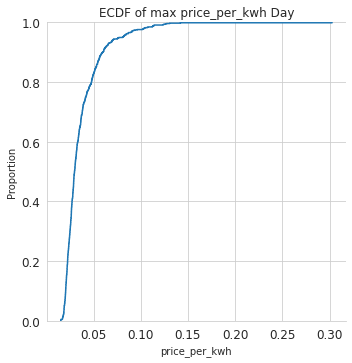

In [ ]:
#@title CDF
Value = "price_per_kwh" #@param [ 'ORKTemperature', 'ORKWindspeed', 'CO2Intensity',       'ActualWindProduction', 'SystemLoadEP2', 'SMPEP2', 'Holiday_code','weight_of_wind', 'non_wind', 'price_per_kwh', 'shift_1d_price_per_kwh',       'shift_2d_price_per_kwh', 'ORKTemperatureEwma1', 'ORKTemperatureEwma7',       'ORKWindspeedEwma1', 'ORKWindspeedEwma7', 'CO2IntensityEwma1',       'CO2IntensityEwma7', 'ActualWindProductionEwma1',       'ActualWindProductionEwma7', 'SystemLoadEP2Ewma1', 'SystemLoadEP2Ewma7',       'SMPEP2Ewma1', 'SMPEP2Ewma7', 'Holiday_codeEwma1', 'Holiday_codeEwma7',       'weight_of_windEwma1', 'weight_of_windEwma7', 'non_windEwma1',       'non_windEwma7', 'price_per_kwhEwma1', 'price_per_kwhEwma7',       'shift_1d_price_per_kwhEwma1', 'shift_1d_price_per_kwhEwma7',       'shift_2d_price_per_kwhEwma1', 'shift_2d_price_per_kwhEwma7',       'price_is_eqOrbellow0', 'Legend', 'weekdayFlag', 'NonHoliWeekDay',       'price_pct_change', 'price_pct_change_EWMVar']
options = {"WeekOfYear":"W","DayOfWeek":"B", "Year":"Y", "Month":"M", "Day":"D", "Hour":"H" }
Agregation = 'Day' #@param ["30 min","WeekOfYear","DayOfWeek", "Year", "Month", "Day", "Hour" ] 
Metric = 'max' #@param ["mean", "count", "max", "min", ""]

if Agregation == "30 min":
  data =df
else: 
  data= df[[Value]].resample(options[Agregation]).agg(Metric)

if Value in ["price_pct_change_EWMVar","price_pct_change"]:
  log=True
else:
  log=False  

print(data[[Value]].quantile([.1, .25, .5, .75, .95, .975]).reset_index().rename(columns={"index":"Quantile"}))
print("\n")
plot = sns.displot(data=data, x= Value,  log_scale=log ,kind="ecdf")
plt.title(f"ECDF of {Metric} {Value} {Agregation}")
plt.show()

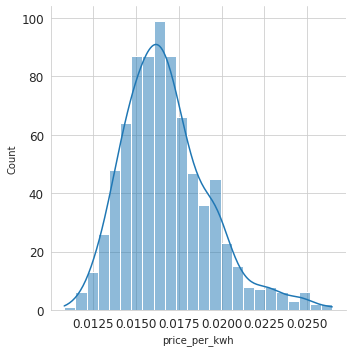

In [ ]:
#@title Distribution
Value = "price_per_kwh" #@param [ 'ORKTemperature', 'ORKWindspeed', 'CO2Intensity',       'ActualWindProduction', 'SystemLoadEP2', 'SMPEP2', 'Holiday_code',       'weight_of_wind', 'non_wind', 'price_per_kwh', 'shift_1d_price_per_kwh',       'shift_2d_price_per_kwh', 'ORKTemperatureEwma1', 'ORKTemperatureEwma7',       'ORKWindspeedEwma1', 'ORKWindspeedEwma7', 'CO2IntensityEwma1',       'CO2IntensityEwma7', 'ActualWindProductionEwma1',       'ActualWindProductionEwma7', 'SystemLoadEP2Ewma1', 'SystemLoadEP2Ewma7',       'SMPEP2Ewma1', 'SMPEP2Ewma7', 'Holiday_codeEwma1', 'Holiday_codeEwma7',       'weight_of_windEwma1', 'weight_of_windEwma7', 'non_windEwma1',       'non_windEwma7', 'price_per_kwhEwma1', 'price_per_kwhEwma7',       'shift_1d_price_per_kwhEwma1', 'shift_1d_price_per_kwhEwma7',       'shift_2d_price_per_kwhEwma1', 'shift_2d_price_per_kwhEwma7',       'price_is_eqOrbellow0', 'Legend', 'weekdayFlag', 'NonHoliWeekDay',       'price_pct_change','price_pct_change_EWMVar']
options = {"WeekOfYear":"W","DayOfWeek":"B", "Year":"Y", "Month":"M", "Day":"D", "Hour":"H" }
Agregation = 'Day' #@param ["30 min","WeekOfYear","DayOfWeek", "Year", "Month", "Day", "Hour" ] 
Metric = 'mean' #@param ["mean", "count", "max", "min", ""]

if Agregation == "30 min":
  data =df
else: 
  data= df[[Value]].resample(options[Agregation]).agg(Metric)

if Value in ["price_pct_change_EWMVar","price_pct_change"]:
  log=True
else:
  log=False  
sns.displot(data=data, x=Value, kind="hist",log_scale=log ,kde=True)

plt.show()
 

In [ ]:
df.loc[  "2013-08-18 05:30:00" ,"price_pct_change"] =df.price_pct_change.quantile(0.99)

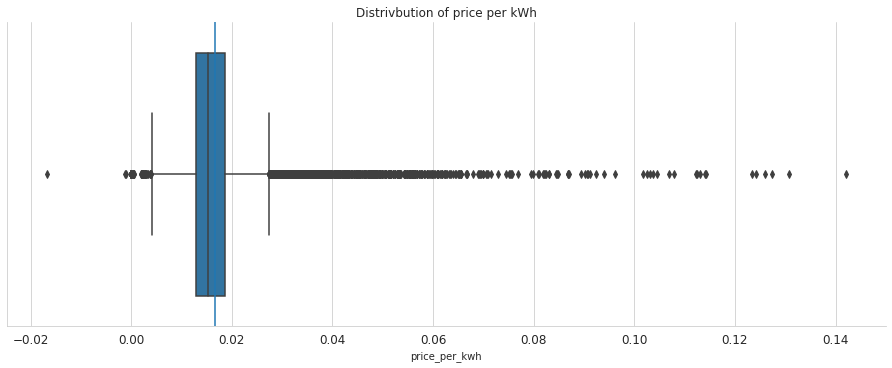

In [ ]:
#@title Distribution
Value = "price_per_kwh" #@param [ 'ORKTemperature', 'ORKWindspeed', 'CO2Intensity',       'ActualWindProduction', 'SystemLoadEP2', 'SMPEP2', 'Holiday_code',       'weight_of_wind', 'non_wind', 'price_per_kwh', 'shift_1d_price_per_kwh',       'shift_2d_price_per_kwh', 'ORKTemperatureEwma1', 'ORKTemperatureEwma7',       'ORKWindspeedEwma1', 'ORKWindspeedEwma7', 'CO2IntensityEwma1',       'CO2IntensityEwma7', 'ActualWindProductionEwma1',       'ActualWindProductionEwma7', 'SystemLoadEP2Ewma1', 'SystemLoadEP2Ewma7',       'SMPEP2Ewma1', 'SMPEP2Ewma7', 'Holiday_codeEwma1', 'Holiday_codeEwma7',       'weight_of_windEwma1', 'weight_of_windEwma7', 'non_windEwma1',       'non_windEwma7', 'price_per_kwhEwma1', 'price_per_kwhEwma7',       'shift_1d_price_per_kwhEwma1', 'shift_1d_price_per_kwhEwma7',       'shift_2d_price_per_kwhEwma1', 'shift_2d_price_per_kwhEwma7',       'price_is_eqOrbellow0', 'Legend', 'weekdayFlag', 'NonHoliWeekDay',       'price_pct_change','price_pct_change_EWMVar']
options = {"WeekOfYear":"W","DayOfWeek":"B", "Year":"Y", "Month":"M", "Day":"D", "Hour":"H" }
Agregation = '30 min' #@param ["30 min","WeekOfYear","DayOfWeek", "Year", "Month", "Day", "Hour" ] 
Metric = 'max' #@param ["mean", "count", "max", "min", ""]

if Agregation == "30 min":
  data =df
else: 
  data= df[[Value]].resample(options[Agregation]).agg(Metric)
data= data[data.price_per_kwh <0.2]
sns.catplot(data = data, x=Value,orient="h", kind= "box",aspect=2.5)
plt.axvline(     data[Value].mean()    )
plt.title(f"Distrivbution of price per kWh")
plt.show()

In [ ]:
def tukeys_method(df, variable):
  #Takes two parameters: dataframe & variable of interest as string
  q1 = df[variable].quantile(0.25)
  q3 = df[variable].quantile(0.75)
  iqr = q3-q1
    
    
  #inner fence lower and upper end
  inner_fence_le = q1- (1.5*iqr) #q1- inner_fence
  inner_fence_ue = q3+ (1.5*iqr)
    
  #outer fence lower and upper end
  outer_fence_le = q1- (3*iqr)
  outer_fence_ue =  q3+ (3*iqr) # q3+outer_fence
    
  outliers_prob = []
  outliers_poss = []
  
  for index, x in enumerate(df[variable]):
    if x <= outer_fence_le or x >= outer_fence_ue:
      outliers_prob.append(index)
  for index, x in enumerate(df[variable]):
    if x <= inner_fence_le or x >= inner_fence_ue:
      outliers_poss.append(index)
		
  return outliers_prob, outliers_poss

probable_outliers_tm, possible_outliers_tm = tukeys_method(df, "price_per_kwh")

print("Percentage of possible outleirs", round((len(possible_outliers_tm)*100) / len(df),4),"%")
print("Percentage of probable outleirs", round((len(probable_outliers_tm)*100) / len(df),4),"%")

Percentage of possible outleirs 5.3112 %
Percentage of probable outleirs 1.5678 %


For visualizations purpose only `non_out` represents the lowest 98.43 % of prices per kwh. Values above that are considered outliers, as per the John Tukey's technique.

This outliers indicates inflated prices.

In [ ]:

x = [x for x in range(len(df)) ]

non_out= list(set(x).difference(set(probable_outliers_tm)))
a = df.iloc[non_out,:]

In [ ]:
a.DayOfWeek.value_counts(normalize=True)


1    0.143835
3    0.143541
4    0.143113
2    0.142819
5    0.142659
0    0.142525
6    0.141509
Name: DayOfWeek, dtype: float64

Most of these inflated prices are located  in Sundays.

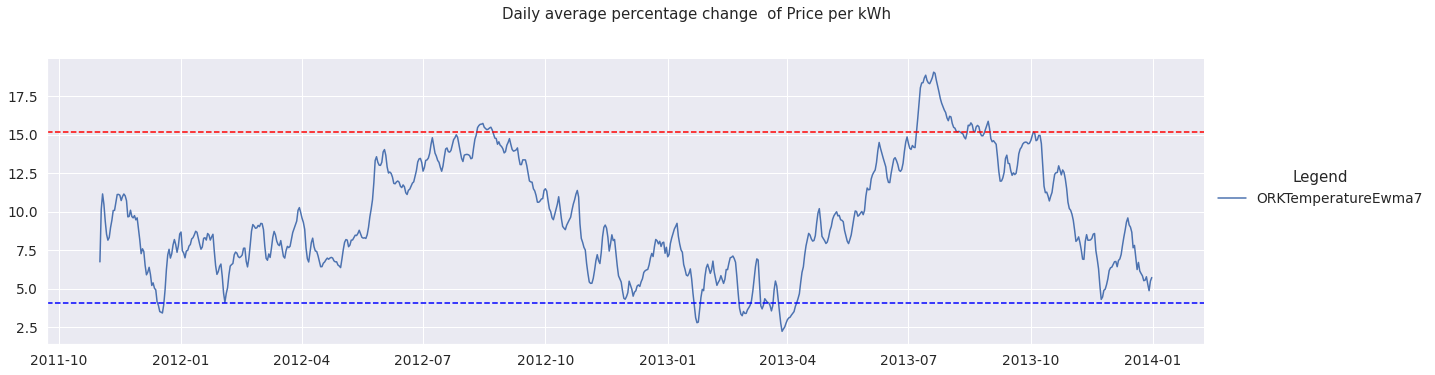

In [ ]:
#@title Distribution
Value = "ORKTemperatureEwma7" #@param [ 'shift_7d_price_per_kwh','ORKTemperature', 'ORKWindspeed', 'CO2Intensity',       'ActualWindProduction', 'SystemLoadEP2', 'SMPEP2', 'Holiday_code',       'weight_of_wind', 'non_wind', 'price_per_kwh', 'shift_1d_price_per_kwh',       'shift_2d_price_per_kwh', 'ORKTemperatureEwma1', 'ORKTemperatureEwma7',       'ORKWindspeedEwma1', 'ORKWindspeedEwma7', 'CO2IntensityEwma1',       'CO2IntensityEwma7', 'ActualWindProductionEwma1',       'ActualWindProductionEwma7', 'SystemLoadEP2Ewma1', 'SystemLoadEP2Ewma7',       'SMPEP2Ewma1', 'SMPEP2Ewma7', 'Holiday_codeEwma1', 'Holiday_codeEwma7',       'weight_of_windEwma1', 'weight_of_windEwma7', 'non_windEwma1',       'non_windEwma7', 'price_per_kwhEwma1', 'price_per_kwhEwma7',       'shift_1d_price_per_kwhEwma1', 'shift_1d_price_per_kwhEwma7',       'shift_2d_price_per_kwhEwma1', 'shift_2d_price_per_kwhEwma7',       'price_is_eqOrbellow0', 'Legend', 'weekdayFlag', 'NonHoliWeekDay',       'price_pct_change','price_pct_change_EWMVar']
options = {"WeekOfYear":"W","DayOfWeek":"B", "Year":"Y", "Month":"M", "Day":"D", "Hour":"H" }
Agregation = 'Day' #@param ["30 min","WeekOfYear","DayOfWeek", "Year", "Month", "Day", "Hour" ] 
Metric = 'mean' #@param ["mean", "count", "max", "min", ""]
Title =  "EWMA 7D Temperature"#@param
date ="none"#@param
end_data="none"#@param
Value2="none"


if Agregation == "30 min" :
  if Value2 != "none":
    data= df[[Value,Value2]]
  else:
    data= df[[Value]]
    
elif Value2 != "none":
  data= df[[Value,Value2]].resample(options[Agregation]).agg(Metric)
elif Value == "price_pct_change":

  data= df[[Value]].resample(options[Agregation]).agg(Metric)
  holid = df.resample(options[Agregation]).agg(max).reset_index()

else : 
  data= df[[Value]].resample(options[Agregation]).agg(Metric)
  holid = df.resample(options[Agregation]).agg(max).reset_index()

 


if date != "none":
  data = data.loc[date:end_data]
  #data = data.loc["2013-10-01":"2013-10-05"]
else:
  data=data



data= data.reset_index().melt(id_vars="DateTime").rename(columns={"variable":"Legend"})

g = sns.relplot(x="DateTime", y="value", kind="line",hue="Legend",data=data,aspect=3.5)
#g.figure.autofmt_xdate()


title= Title
g.fig.suptitle(title, fontsize = 15, y=1.1)
g.set(ylabel ="" , xlabel= "" )

#plt.axhline(data.query('Legend == @Value')["value"].mean(), color="g")
plt.axhline(data.query('Legend == @Value')["value"].quantile(.05),linestyle='--', color="blue")
plt.axhline(data.query('Legend == @Value')["value"].quantile(.93),linestyle='--',color="red")

plt.show()

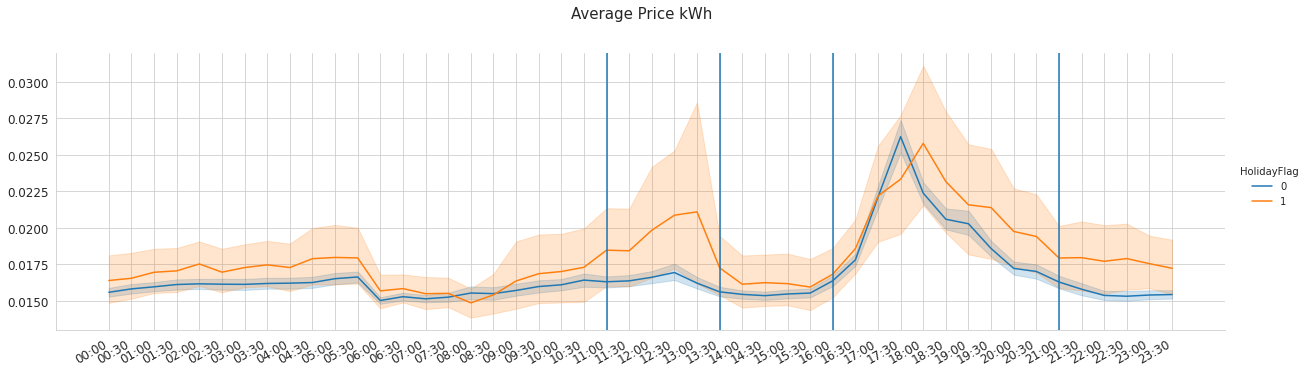

In [ ]:
Value = "price_per_kwh" 
options = {"WeekOfYear":"W","DayOfWeek":"B", "Year":"Y", "Month":"M", "Day":"D", "Hour":"H" }
Agregation = '30min'  
Metric = 'mean'
hue = "HolidayFlag" 

data= df.copy()
data.reset_index(inplace=True)
data= data[data.price_per_kwh <0.2]
if  Agregation == 'DayOfWeek':
  icon = "a"
  list_ = ["Mon 00:00","Tue 00:00","Wed 00:00","Thu 00:00","Fri 00:00","Sat 00:00","Sun 00:00"]
elif  Agregation == 'Day':
  icon = "d"
  list_ = [f"0{i} 00:00" for i in range(1,10)]+[f"{i} 00:00" for i in range(10,31)]
elif Agregation == '30min':
    icon = ""
    list_ = [f"0{i}:00" for i in range(10)]+[f"{i}:00" for i in range(10,24)]
    list__ = [f"0{i}:30" for i in range(10)]+[f"{i}:30" for i in range(10,24)]
    list_=list_+list__

else:
  icon = "b"
  months = [i for i in data.DateTime.dt.strftime(f"%{icon}").unique()]
  list_=[f"0{i} 00:00" for i in range(1,10)]
if Agregation == '30min':
  data["DateTime"]=data["DateTime"].dt.strftime("%H:%M")
else:  
  data["DateTime"]=data["DateTime"].dt.strftime(f"%{icon} %H:%M")

title="Average Price kWh"


g = sns.relplot(x="DateTime", y=Value, hue=hue,kind="line",data=data,aspect=3.5)
g.figure.autofmt_xdate()
g.fig.suptitle(title, fontsize = 15, y=1.1)
g.set(ylabel ="" , xlabel= "" )
g=plt.xticks(list_,list_)
plt.axvline("11:00")
plt.axvline("13:30")
plt.axvline("16:00")
plt.axvline("21:00")
plt.show()

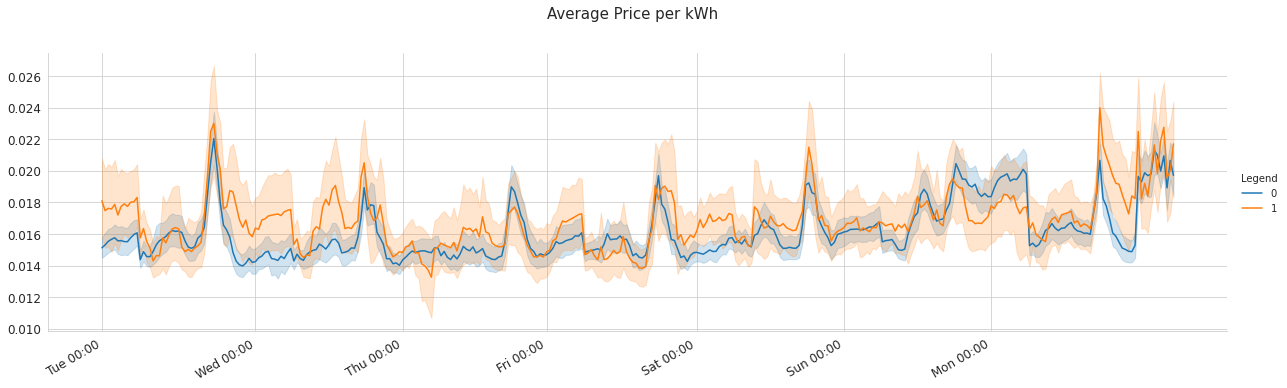

In [ ]:

#@title Distribution
Value = "price_per_kwh" #@param [ 'ORKTemperature', 'ORKWindspeed', 'CO2Intensity',       'ActualWindProduction', 'SystemLoadEP2', 'SMPEP2', 'Holiday_code',       'weight_of_wind', 'non_wind', 'price_per_kwh', 'shift_1d_price_per_kwh',       'shift_2d_price_per_kwh', 'ORKTemperatureEwma1', 'ORKTemperatureEwma7',       'ORKWindspeedEwma1', 'ORKWindspeedEwma7', 'CO2IntensityEwma1',       'CO2IntensityEwma7', 'ActualWindProductionEwma1',       'ActualWindProductionEwma7', 'SystemLoadEP2Ewma1', 'SystemLoadEP2Ewma7',       'SMPEP2Ewma1', 'SMPEP2Ewma7', 'Holiday_codeEwma1', 'Holiday_codeEwma7',       'weight_of_windEwma1', 'weight_of_windEwma7', 'non_windEwma1',       'non_windEwma7', 'price_per_kwhEwma1', 'price_per_kwhEwma7',       'shift_1d_price_per_kwhEwma1', 'shift_1d_price_per_kwhEwma7',       'shift_2d_price_per_kwhEwma1', 'shift_2d_price_per_kwhEwma7',       'price_is_eqOrbellow0', 'Legend', 'weekdayFlag', 'NonHoliWeekDay',       'price_pct_change','price_pct_change_EWMVar']
options = {"WeekOfYear":"W","DayOfWeek":"B", "Year":"Y", "Month":"M", "Day":"D", "Hour":"H" }
Agregation = 'DayOfWeek' #@param ["DayOfWeek", "Month", "Day", "30min"] 
Metric = 'mean' #@param ["mean", "count", "max", "min", ""]
hue = "Legend" #@param ["Legend", "HolidayFlag", "weekdayFlag","NonHoliWeekDay"]

data= df.copy()
#data= data[data.price_per_kwh <0.2]
data= data.iloc[non_out,:]
data.reset_index(inplace=True)

if  Agregation == 'DayOfWeek':
  icon = "a"
  list_ = ["Mon 00:00","Tue 00:00","Wed 00:00","Thu 00:00","Fri 00:00","Sat 00:00","Sun 00:00"]
elif  Agregation == 'Day':
  icon = "d"
  list_ = [f"0{i} 00:00" for i in range(1,10)]+[f"{i} 00:00" for i in range(10,31)]
elif Agregation == '30min':
    icon = ""
    list_ = [f"0{i}:00" for i in range(10)]+[f"{i}:00" for i in range(10,24)]
    list__ = [f"0{i}:30" for i in range(10)]+[f"{i}:30" for i in range(10,24)]
    list_=list_+list__
else:
  icon = "b"
  months = [i for i in data.DateTime.dt.strftime(f"%{icon}").unique()]
  list_=[f"{months} 00:00" for i in range(1,10)]
if Agregation == '30min':
  data["DateTime"]=data["DateTime"].dt.strftime("%H:%M")
else:  
  data["DateTime"]=data["DateTime"].dt.strftime(f"%{icon} %H:%M")

title="Average Price per kWh"


g = sns.relplot(x="DateTime", y=Value, hue=hue,kind="line",data=data,aspect=3.5)
g.figure.autofmt_xdate()
g.fig.suptitle(title, fontsize = 15, y=1.1)
g.set(ylabel ="" , xlabel= "" )
g=plt.xticks(list_,list_)

plt.show()

**Legend is 1 when the week as a Holiday**

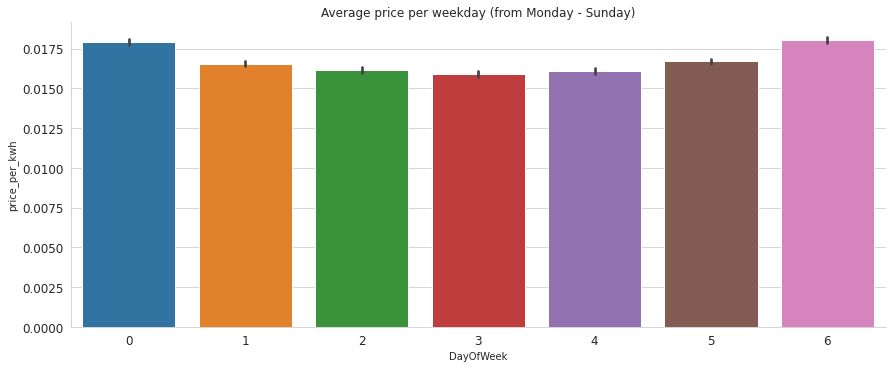

In [ ]:
#@title Bar
Value = "price_per_kwh" #@param [ 'ORKTemperature', 'ORKWindspeed', 'CO2Intensity',       'ActualWindProduction', 'SystemLoadEP2', 'SMPEP2', 'Holiday_code',       'weight_of_wind', 'non_wind', 'price_per_kwh', 'shift_1d_price_per_kwh',       'shift_2d_price_per_kwh', 'ORKTemperatureEwma1', 'ORKTemperatureEwma7',       'ORKWindspeedEwma1', 'ORKWindspeedEwma7', 'CO2IntensityEwma1',       'CO2IntensityEwma7', 'ActualWindProductionEwma1',       'ActualWindProductionEwma7', 'SystemLoadEP2Ewma1', 'SystemLoadEP2Ewma7',       'SMPEP2Ewma1', 'SMPEP2Ewma7', 'Holiday_codeEwma1', 'Holiday_codeEwma7',       'weight_of_windEwma1', 'weight_of_windEwma7', 'non_windEwma1',       'non_windEwma7', 'price_per_kwhEwma1', 'price_per_kwhEwma7',       'shift_1d_price_per_kwhEwma1', 'shift_1d_price_per_kwhEwma7',       'shift_2d_price_per_kwhEwma1', 'shift_2d_price_per_kwhEwma7',       'price_is_eqOrbellow0', 'Legend', 'weekdayFlag', 'NonHoliWeekDay',       'price_pct_change','price_pct_change_EWMVar']
options = {"WeekOfYear":"W","DayOfWeek":"B", "Year":"Y", "Month":"M", "Day":"D", "Hour":"H" }
Agregation = 'DayOfWeek' #@param ["PeriodOfDay","WeekOfYear","DayOfWeek", "Year", "Month", "Day", "Hour" ] 
Metric =  np.mean #@param [] {type:"raw", allow-input: true}
data= df[df.price_per_kwh <0.2]
#data= df.iloc[non_out,:]
  
sns.catplot(data = data ,x=Agregation , y=Value, kind= "bar",aspect=2.5, estimator=Metric)
plt.title("Average price per weekday (from Monday - Sunday)")
plt.show()

##Special Weeks

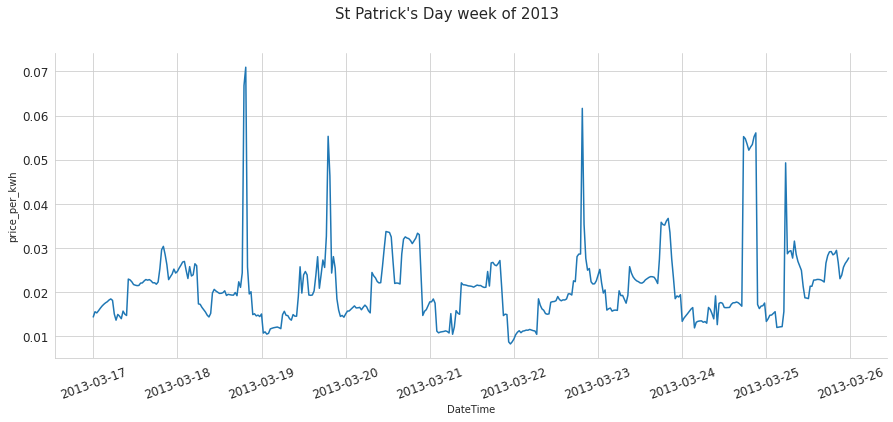

In [ ]:
Year = "2013" #@param ["2011","2012","2013"]
Week = "St Patrick's Day" #@param ["First","Last",	"St Patrick's Day"]
Value = "price_per_kwh" #@param [ 'ORKTemperature', 'ORKWindspeed', 'CO2Intensity',       'ActualWindProduction', 'SystemLoadEP2', 'SMPEP2', 'Holiday_code',       'weight_of_wind', 'non_wind', 'price_per_kwh', 'shift_1d_price_per_kwh',       'shift_2d_price_per_kwh', 'ORKTemperatureEwma1', 'ORKTemperatureEwma7',       'ORKWindspeedEwma1', 'ORKWindspeedEwma7', 'CO2IntensityEwma1',       'CO2IntensityEwma7', 'ActualWindProductionEwma1',       'ActualWindProductionEwma7', 'SystemLoadEP2Ewma1', 'SystemLoadEP2Ewma7',       'SMPEP2Ewma1', 'SMPEP2Ewma7', 'Holiday_codeEwma1', 'Holiday_codeEwma7',       'weight_of_windEwma1', 'weight_of_windEwma7', 'non_windEwma1',       'non_windEwma7', 'price_per_kwhEwma1', 'price_per_kwhEwma7',       'shift_1d_price_per_kwhEwma1', 'shift_1d_price_per_kwhEwma7',       'shift_2d_price_per_kwhEwma1', 'shift_2d_price_per_kwhEwma7',       'price_is_eqOrbellow0', 'Legend', 'weekdayFlag', 'NonHoliWeekDay',       'price_pct_change','price_pct_change_EWMVar']
day_begin="2011-12-24" #@param
day_end="2012-01-03"#@param

if Year == "2011":
  y=1
elif Year == "2012":
  y=2
else:
  y=3

if Week == "Last":
  week = [  f"201{y}-12-22"   ,   f"201{y+1}-01-04"  ]  
else: 
  if Week == "First" :
    m_d=["01-01","01-07"]
  elif Week == "St Patrick's Day" :
    m_d=["03-17","03-25"]
  week = [  f"201{y}-"+m_d[0]   ,   f"201{y}-"+m_d[1]    ]
 
d = df.loc[week[0]: week[1]].reset_index()

#d = df.loc[day_begin: day_end].reset_index()

g=sns.relplot(data=d , x="DateTime", y=Value, kind="line" , aspect=2.5)
g.fig.suptitle(f"{Week} week of {Year}", fontsize = 15, y=1.1)
plt.xticks(rotation=20)
plt.show()

#Hypothesis

In [ ]:
#@title Hypothesis :Mean daily price is higher in Holidays.
data0= df[ df.HolidayFlag==0].resample("D").mean().dropna()
data1= df[ df.HolidayFlag==1].resample("D").mean().dropna()


data0 = data0["price_per_kwh"].values
data1 = data1["price_per_kwh"].values


obs=diff_of_means(data0,data1 )

reps = draw_perm_reps(data0,data1,diff_of_means,size=10000)

p = np.sum(reps <= obs) / len(reps)

print("Hypothesis testing (10,000 interations) \nNull : Both holidays and non-holidays daily mean price have the same distribution\n")
print("Observed difference",round(obs,4))
print("p-value: ",p, "\nEnergy in Holidays tend to cost {} cents/kWh more".format(round(abs(obs),4)))

Hypothesis testing (10,000 interations) 
Null : Both holidays and non-holidays daily mean price have the same distribution

Observed difference -0.0013
p-value:  0.003 
Energy in Holidays tend to cost 0.0013 cents/kWh more


In [ ]:
#@title Hypothesis :Mean daily price is higher for Sundays and Mondays compared to rest of week.

data0= df[ (df.weekdayFlag==1)&(df.HolidayFlag==0)].resample("D").mean().dropna()
data1= df[ df.NonHoliWeekDay==1].resample("D").mean().dropna()

data0 = data0["shift_1d_price_per_kwh"].values
data1 = data1["shift_1d_price_per_kwh"].values


obs=diff_of_means(data0,data1 )

reps = draw_perm_reps(data0,data1,diff_of_means,size=10000)

p = np.sum(reps >= obs) / len(reps)

print("Hypothesis testing (10,000 interations) \nNull : All days in a week have the same distribution\n")
print("Observed difference",round(obs,4))
print("p-value: ",p, "\n Days between Tuesday and Saturday (not incluing holidays) tend to cost {} cents/kWh less ".format(round(obs,4)))


Hypothesis testing (10,000 interations) 
Null : All days in a week have the same distribution

Observed difference 0.0017
p-value:  0.0 
 Days between Tuesday and Saturday (not incluing holidays) tend to cost 0.0017 cents/kWh less 


In [ ]:

#@title Hypothesis :Mean daily price is higher between 16:00 -21:00.

data0= df[(df.PeriodOfDay>=32) & (df.PeriodOfDay<=43) ].resample("D").mean().dropna()
data1= df[(df.PeriodOfDay<32) | (df.PeriodOfDay>43) ].resample("D").mean().dropna()

data0 = data0["shift_1d_price_per_kwh"].values
data1 = data1["shift_1d_price_per_kwh"].values


obs=diff_of_means(data0,data1 )

reps = draw_perm_reps(data0,data1,diff_of_means,size=10000)

p = np.sum(reps >= obs) / len(reps)


print("Hypothesis testing (10,000 interations) \nNull : The data within a day has the same distribution\n")
print("Observed difference",round(obs,4))
print("p-value: ",p, "\n Time between 16:00-21:00 tend to cost {} cents/kWh more ".format(round(obs,4)))


Hypothesis testing (10,000 interations) 
Null : All days in a week have the same distribution

Observed difference 0.0033
p-value:  0.0 
 Days between Tuesday and Saturday (not incluing holidays) tend to cost 0.0033 cents/kWh less 


In [ ]:
data0.mean()

0.01926084884286667

In [ ]:
data1.mean()

0.01591647336727

In [ ]:
(0.0033*100)/0.015916

20.733852726815783

If a data center spends 150 watts per squared foot than ($\frac{150W * 24h}{1000}$ =3.6 kWh )


A 50-cabinet data center takes arround 17,600 squared foot. Thus 3.6 kWh x 0.0009cent. x17,600 =  57.02 $ per day

In our example, a day between Tuesday and Saturday would cost around 107.71 $/day less compared to Sunday and Monday.

But holidays would cost, on average 82.37 $/day more compared to the rest of the year.

Energy spent between 16:00 and 21:00 is 209.00 $ more expensive then the rest of the day.

  * "*A recent study by the Ponemon Institute, funded by Emerson Network Power(...) it costs as much as 64 percent less on average to provide 1kW of IT capacity in the larger facility...*." [link ](https://www.datacenterknowledge.com/archives/2016/08/23/what-is-the-data-center-cost-of-1kw-of-it-capacity)

# Predict

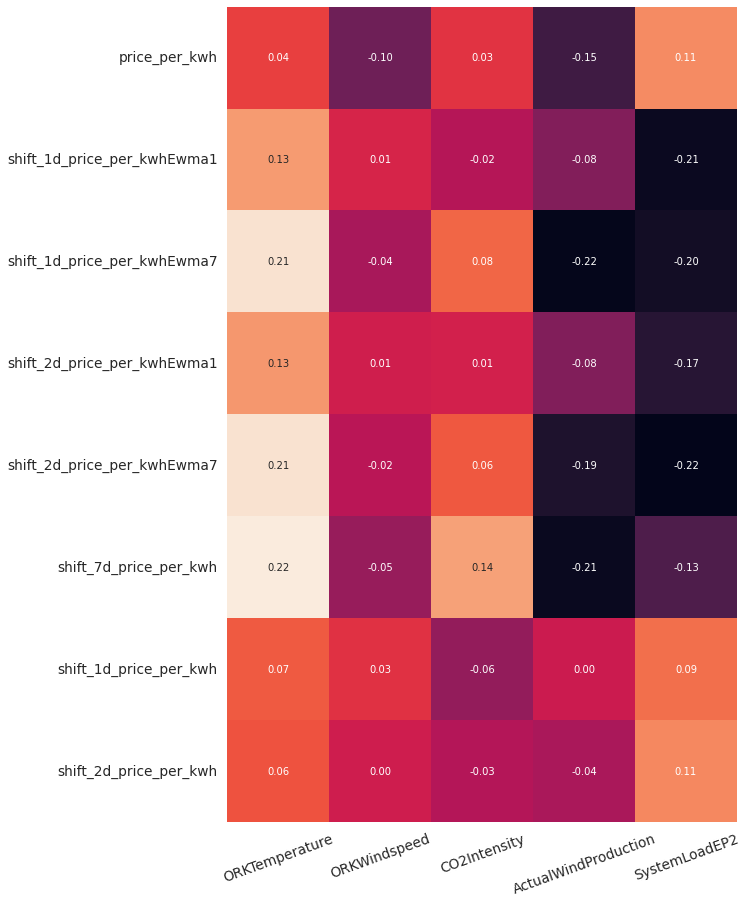

In [ ]:
Data= "Today" #@param ["Today", "TodayEWMA1D", "TodayEWMA7D"]

if Data == "Today":
  cols_i=[8,9,10,11,12,15,17]


elif Data =="TodayEWMA1D" :
  cols_i=[20,22,24,26,28,34,38]
  

else:
  cols_i=[21,23,25,27,29,35,39]

cols_i =  cols_i+list(range(40,45))+[18,19]
data = df.iloc[49:,cols_i]
cm = data.corr().iloc[-8:,:-9]
cm_ = data.corr()
sns.set(font_scale=1.25,rc= {"figure.figsize": (14,15)})

hm = sns.heatmap(cm, 
									cbar=False, 
									annot=True, 
									square=True, 
									fmt='.2f'#,  yticklabels=False)
									,annot_kws={'size': 10} 
									,xticklabels=True, 
									yticklabels=True)#cols.values)
plt.xticks(rotation=20)
plt.show()


In [ ]:
data = df.copy()
data.reset_index(inplace=True)
data["Year"]= data["Year"].astype("str")
data["Month"]= data["Month"].astype("str")
data["Day"]= data["Day"].astype("str")
data["PeriodOfDay"]= data["PeriodOfDay"].astype("str")

data["YearMonth"] = data["Year"]+data["Month"]
data["DayPeriodOfDay"] = data["Day"]+data["PeriodOfDay"]

cols_i = [2,9,10,11,12,13,14] + list(range(16,33))+list(range(35,41))+list(range(46,50))+[51,52] +list(range(53,58))
data= data.iloc[49:,cols_i]




di={}

for i in data.columns:
  if data[i].dtype=="float64":
    di[i] ='mean'
  else: 
    di[i] ='max'
  
 
data["YearMonth"] =data["YearMonth"].astype("int64") 
data["DayPeriodOfDay"] =data["DayPeriodOfDay"].astype("int64") 

data = data.groupby(["YearMonth","DayPeriodOfDay"]).agg(di)
for i in data.columns:
  if data[i].dtype=="int64":
    data[i] =data[i].astype("category")  
  else: 
    continue
data= data.iloc[:,:-2]

cols_i = list(range(0,9))+[10,11] +list(range(30,38))
exog_ = data.iloc[:,cols_i]
endog_ = data.iloc[:,9]


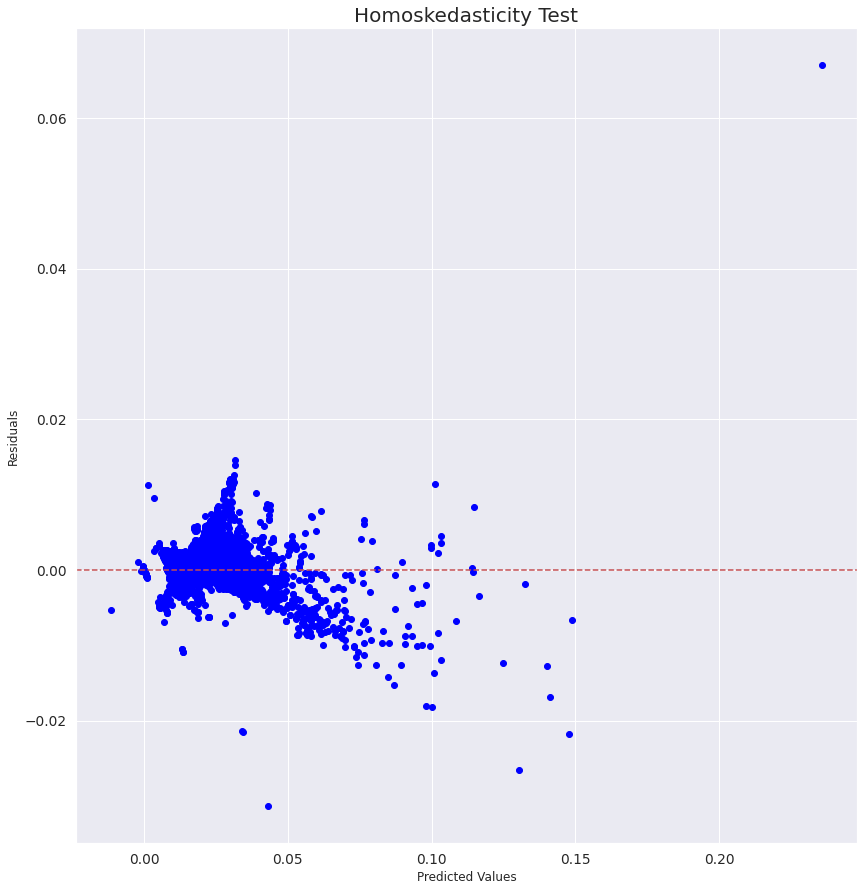

In [ ]:

from linearmodels import PooledOLS
import statsmodels.api as sm


exog = sm.tools.tools.add_constant(exog_).fillna(0)
endog = endog_
mod = PooledOLS(endog, exog,check_rank=False)
pooledOLS_res = mod.fit(cov_type='clustered', cluster_entity=True)
fittedvals_pooled_OLS = pooledOLS_res.predict().fitted_values
residuals_pooled_OLS = pooledOLS_res.resids

fig, ax = plt.subplots()
ax.scatter(fittedvals_pooled_OLS, residuals_pooled_OLS, color = 'blue')
ax.axhline(0, color = 'r', ls = '--')
ax.set_xlabel('Predicted Values', fontsize = 12)
ax.set_ylabel('Residuals', fontsize = 12)
ax.set_title('Homoskedasticity Test', fontsize = 20)
plt.show()




In [ ]:
from statsmodels.stats.diagnostic import het_white, het_breuschpagan


pooled_OLS_dataset = pd.concat([data, residuals_pooled_OLS], axis=1)

labels = ['LM p-val',  'F p-val'] 

breusch_pagan_test_results = het_breuschpagan(pooled_OLS_dataset["residual"], exog)

print(dict(zip(labels, breusch_pagan_test_results)))

{'LM p-val': 5918.969428872063, 'F p-val': 0.0}


In [ ]:
from statsmodels.stats.stattools import durbin_watson

durbin_watson_test_results = durbin_watson(pooled_OLS_dataset['residual']) 
print(durbin_watson_test_results)

0.7106446686264751


positive autocorrelation 

In [ ]:
from linearmodels import PanelOLS

model_fe0 = PanelOLS(endog, exog, entity_effects = True,check_rank=False,drop_absorbed=True) 
fe_res0 = model_fe0.fit() 

print(fe_res0)

/usr/local/lib/python3.7/dist-packages/linearmodels/panel/model.py:1833: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

non_wind

  AbsorbingEffectWarning,


                          PanelOLS Estimation Summary                           
Dep. Variable:          price_per_kwh   R-squared:                        0.9619
Estimator:                   PanelOLS   R-squared (Between):              0.9251
No. Observations:               35877   R-squared (Within):               0.9619
Date:                Wed, Jan 26 2022   R-squared (Overall):              0.9600
Time:                        03:28:48   Log-likelihood                 1.874e+05
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                   5.026e+04
Entities:                          26   P-value                           0.0000
Avg Obs:                       1379.9   Distribution:                F(18,35833)
Min Obs:                       1268.0                                           
Max Obs:                       1402.0   F-statistic (robust):          5.026e+04
                            

In [ ]:

exog6=exog.loc[:,['const',"HolidayFlag" ,'ORKWindspeed', 'CO2Intensity',
       'ActualWindProduction', 'SystemLoadEP2', 'SMPEP2', 'weight_of_wind',
       'shift_1d_price_per_kwh', 'shift_2d_price_per_kwh',
       'price_is_eqOrbellow0', 'Legend',  'NonHoliWeekDay',
       'price_pct_change',"inflatedShifted1d","inflatedShifted2d",
       'price_pct_change_EWMVar']]



sqr_cols= [ 'ORKWindspeed', 'ActualWindProduction', 'SystemLoadEP2','CO2Intensity',"weight_of_wind",
         'price_pct_change']

for i in sqr_cols: 
  name = i + "2"
  exog6[name]= exog6[i]**2 

model_fe6 = PanelOLS(endog, exog6, entity_effects = True,check_rank=False,drop_absorbed=True) 
fe_res6 = model_fe6.fit() 

print(fe_res6)

                          PanelOLS Estimation Summary                           
Dep. Variable:          price_per_kwh   R-squared:                        0.9624
Estimator:                   PanelOLS   R-squared (Between):              0.9251
No. Observations:               35877   R-squared (Within):               0.9624
Date:                Wed, Jan 26 2022   R-squared (Overall):              0.9604
Time:                        03:28:49   Log-likelihood                 1.876e+05
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                   4.164e+04
Entities:                          26   P-value                           0.0000
Avg Obs:                       1379.9   Distribution:                F(22,35829)
Min Obs:                       1268.0                                           
Max Obs:                       1402.0   F-statistic (robust):          4.164e+04
                            

This is the best model so far : 
* highest R-squared 
* significant F
* All parameters have significant values at alpha = 0.05

The most expressive variables to predict tomorrows price are:
* The price of the day before (per kWh and total spent nation wide `SMPEP2`).
  Makes sense because the price is decided on-demand / offer prices from the day before (usually 12h lag)  

* Also the day: if weekend, holiday or bussiness day.

In [ ]:
y_test = endog[-2928:]
y_train = endog[:-2928]
x_test = exog6[-2928:]
x_train = exog6[:-2928]

model_fe_final = PanelOLS(y_train, x_train, entity_effects = True,check_rank=False,drop_absorbed=True) 
y_pred= model_fe_final.fit().predict(x_test)
y_pred["y_test"]=y_test
y_pred.reset_index(inplace=True)
y_pred=y_pred.iloc[:2890,:]
a=df.loc["2013-10-27 19:00:00":"2013-12-30 23:30:00", ["Year","PeriodOfDay","Day", "Month"]]

a.reset_index(inplace=True)



a["Year"]= a["Year"].astype("str")
a["Month"]= a["Month"].astype("str")
a["Day"]= a["Day"].astype("str")
a["PeriodOfDay"]= a["PeriodOfDay"].astype("str")

a["YearMonth"] = a["Year"]+a["Month"]
a["DayPeriodOfDay"] = a["Day"]+a["PeriodOfDay"]
a["YearMonth"] = a["YearMonth"].astype("int64")
a["DayPeriodOfDay"] = a["DayPeriodOfDay"].astype("int64")
b = pd.merge(y_pred, a, on = ["YearMonth", "DayPeriodOfDay"], how = "inner")
pred_test = b.loc[:,["DateTime", "y_test", "predictions"]]


## Simulating a constant usage 100 kWh per 30 min

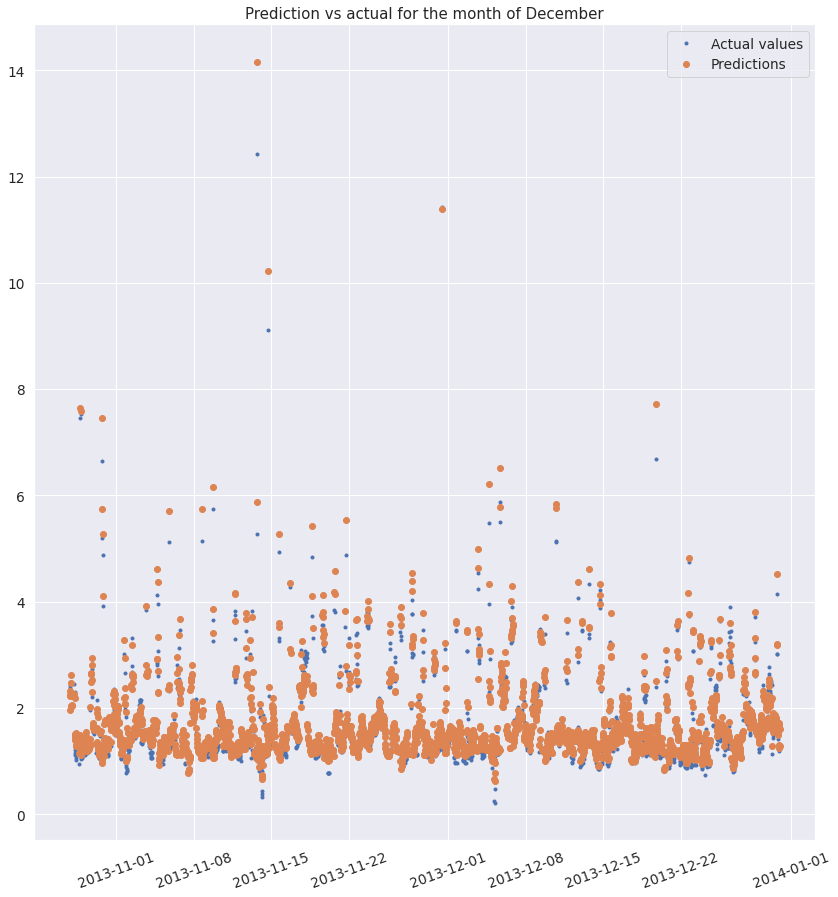

In [ ]:
sim = pred_test.copy()
sim["y_test"]= sim["y_test"]*100
sim["predictions"]= sim["predictions"]*100

plt.plot(sim["DateTime"],sim["y_test"],'.')
plt.plot(sim["DateTime"],sim["predictions"],'o')
plt.legend(["Actual values","Predictions"])
plt.xticks(rotation=20)
plt.title("Prediction vs actual for the month of December")
plt.show()

In [ ]:
# Mean Squared Error
MSE = np.square(np.subtract(sim["y_test"],sim["predictions"])).mean()
print("MSE:", MSE)

MSE: 0.01573825902213042


In [ ]:
high_values = sim[sim["y_test"]> 2.5]
MSE = np.square(np.subtract(high_values["y_test"],high_values["predictions"])).mean()
print("MSE for values >2.5:", MSE)

MSE for values >2.5: 0.07800806734021733


In [ ]:
sim_daily = sim.set_index("DateTime").resample("D").sum().iloc[1:,:]
sim_daily.describe()

,y_test,predictions
count,64.000000,64.000000
mean,76.842012,79.342198
std,8.903878,7.889609
min,60.071900,63.473276
25%,70.956408,74.992177
50%,75.616149,78.223942
75%,81.868489,83.613630
max,99.676739,101.509366


In [ ]:
a = sim_daily.sum(axis=0)[0]
b= sim_daily.sum(axis=0)[1]
c= round(abs(a-b),3)
z = round(c*100/a,2)

print("Given this scenario, the total cost would have been {}$ and we would predict {}$. A difference of {} $ ({}%)".format(round(a,2),round(b,2),c, z)) 

Given this scenario, the total cost would have been 4917.89$ and we would predict 5077.9$. A difference of 160.012 $ (3.25%)


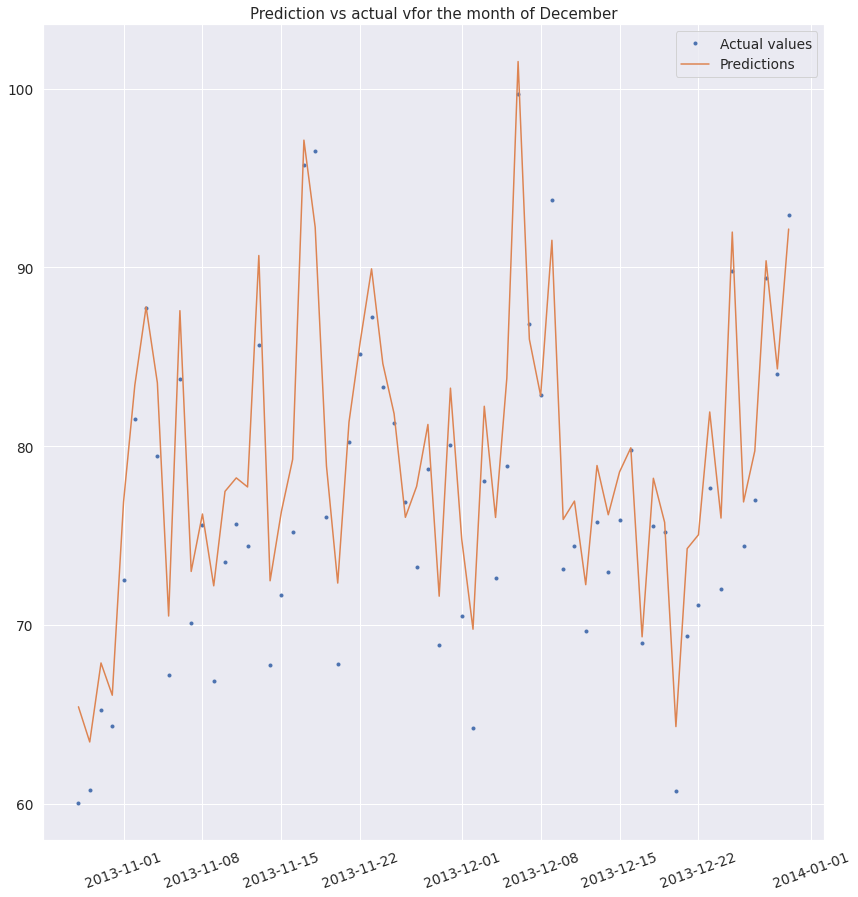

In [ ]:
plt.plot(sim_daily.index,sim_daily["y_test"],'.')
plt.plot(sim_daily.index,sim_daily["predictions"],'-')
plt.legend(["Actual values","Predictions"])
plt.xticks(rotation=20)
plt.title("Prediction vs actual vfor the month of December")
plt.show()

Predict days where cost was inflated (> 25 percentile) 

In [ ]:

sim_daily["high_test"] = 0
sim_daily["high_pred"] = 0
sim_daily.loc[sim_daily["predictions"] >80,"high_pred"]=1
sim_daily.loc[sim_daily["y_test"] >80,"high_test"]=1
sim_daily["high_eval"]= 0
sim_daily.loc[sim_daily["high_test"]==sim_daily["high_pred"],"high_eval"]=1
a = sim_daily[sim_daily["high_test"]==1].high_eval.value_counts(normalize=True).values[0]

print("Percentage of most expensive days predicted by the model (TP/P): {} %".format(round(a*100,2)))

Percentage of most expensive days predicted by the model (TP/P): 100.0 %


In [ ]:
sim_daily["compared"]=0
sim_daily.loc[sim_daily["y_test"] < sim_daily["predictions"] ,   "compared"]=1
print("Percentage of overpredictions : ",sim_daily["compared"].sum()*100 /len(sim_daily),"%")               

Percentage of overpredictions :  90.625 %


The model is simple and overpredicting. But that could help us predicting high prices.

In [ ]:
df.groupby("Year").mean()["price_per_kwh"]

In [ ]:
print("Price increase from 2012 to 2013", round(((0.17216-0.16684)*100)/0.16684,2), "%")
print("Price increase from 2011 to 2014", round(((0.17216-0.16684)*100)/0.16684,2), "%")

price increase from 2012 to 2013 3.19 %


# Conclusions

In [ ]:
df.groupby("Year").mean()["price_per_kwh"]

Year
2011    0.014583
2012    0.016684
2013    0.017216
Name: price_per_kwh, dtype: float64

In [ ]:
print("Year-to-year inflation: ", round( ((0.017216-0.016684)*100)/0.016684  ,2), "%")

Year-to-year inflation:  3.19 %


* 16:00 - 21:00 electricity tends to be most expensive 
* Sundays and Mondays are more expensive.
* In the hypothesis testing section I concluded that a 50-cabinets data center can cost around 82.37 \$ per day more in holidays. Also 107.71 $ per day more on Sundays or Mondays. 
* The model was able to predict the days where the price would have been inflated, using data from the day before thus helping make decisions on a day-to-day basis.
* Energy spent between 16:00 and 21:00 is 209.00 \$ more expensive then the rest of the day.
